# Insurance Dataset


Import Pandas and Numpy as library to use

In [1]:
import pandas as pd
import numpy as np

Import the dataset

In [2]:
insurance = pd.read_csv('C://Users/mkrijal/Desktop/Insurance/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get information of dataset

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Get total column and rows

In [3]:
#Total column
insurance.shape[1]

7

In [4]:
#Total row
insurance.shape[0]

1338

Get total insurance client by sex

In [6]:
insurance.groupby('sex').size()

sex
female    662
male      676
dtype: int64

Get total insurance client by smoker type

In [8]:
insurance.groupby('smoker').size()

smoker
no     1064
yes     274
dtype: int64

Get total insurance client by region

In [9]:
insurance.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

Get total insurance client by sex, smoker type and region

In [18]:
insurance.groupby([insurance['sex'], insurance['smoker'], insurance['region']]).size()


sex     smoker  region   
female  no      northeast    132
                northwest    135
                southeast    139
                southwest    141
        yes     northeast     29
                northwest     29
                southeast     36
                southwest     21
male    no      northeast    125
                northwest    132
                southeast    134
                southwest    126
        yes     northeast     38
                northwest     29
                southeast     55
                southwest     37
dtype: int64

The southeast region contain the highest number of smoker with insurance: **55 male** and **36** female. The southwest and northwest region contain the lowest number of smoker with insurance: **37** male (sw) **21** female (sw) and **29** male (ne) and **29** female (ne).

Get average insurance charges client by sex, smoker type and region

In [19]:
insurance['charges'].groupby([insurance['sex'], insurance['smoker'], insurance['region']]).mean()

sex     smoker  region   
female  no      northeast     9640.426984
                northwest     8786.998679
                southeast     8440.205552
                southwest     8234.091260
        yes     northeast    28032.046398
                northwest    29670.824946
                southeast    33034.820716
                southwest    31687.988430
male    no      northeast     8664.042222
                northwest     8320.689321
                southeast     7609.003587
                southwest     7778.905534
        yes     northeast    30926.252583
                northwest    30713.181419
                southeast    36029.839367
                southwest    32598.862854
Name: charges, dtype: float64

The average charges list show, smoker spend more for their insurance. Furthermore, male smoker spend more than female smoker.

Then,get the max and min charges

In [20]:
#function min and max
def get_stats(group):
    return {'min': group.min(), 'max': group.max()}

In [22]:
insurance['charges'].groupby([insurance['sex'], insurance['smoker'], insurance['region']]).apply(get_stats)

sex     smoker  region        
female  no      northeast  max    31620.00106
                           min     2196.47320
                northwest  max    33471.97189
                           min     2117.33885
                southeast  max    36580.28216
                           min     1607.51010
                southwest  max    36910.60803
                           min     1727.78500
        yes     northeast  max    58571.07448
                           min    14283.45940
                northwest  max    55135.40209
                           min    14711.74380
                southeast  max    63770.42801
                           min    16577.77950
                southwest  max    48824.45000
                           min    13844.50600
male    no      northeast  max    32108.66282
                           min     1694.79640
                northwest  max    30284.64294
                           min     1621.34020
                southeast  max    27724.28875
   

The highest chargest is from male smoker in southeast region with **62592.87**USD. 
The lowest charges is from non smoker male from southeast region with **1121.87** USD.

Select male smoker from southeast region 

In [25]:
malesmoker_se = insurance[(insurance['sex']=='male') & (insurance['smoker']=='yes') & (insurance['region']=='southeast')]
malesmoker_se.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
49,36,male,35.20,1,yes,southeast,38709.1760
53,36,male,34.43,0,yes,southeast,37742.5757
57,18,male,31.68,2,yes,southeast,34303.1672
69,28,male,23.98,3,yes,southeast,17663.1442


In [26]:
#narrow the dataset by selecting column age, bmi, children and charges
malesmoker_se_num_only = malesmoker_se[['age','bmi','children','charges']]
malesmoker_se_num_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 14 to 1300
Data columns (total 4 columns):
age         55 non-null int64
bmi         55 non-null float64
children    55 non-null int64
charges     55 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.1 KB


Create a graph based on malesmoker_se_num_only data

In [28]:
import matplotlib.pyplot as plt

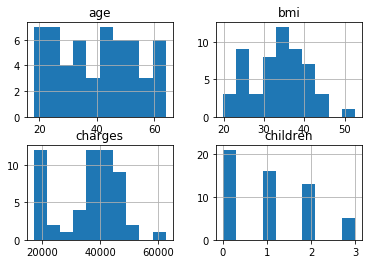

In [29]:
dataint = malesmoker_se_num_only[['age','bmi','children','charges']]
dataint.hist()
plt.show();

Check the correlation among all attributes

In [30]:
malesmoker_se_num_only.corr()

,age,bmi,children,charges
age,1.000000,-0.096353,0.002546,0.324185
bmi,-0.096353,1.000000,0.081277,0.745684
children,0.002546,0.081277,1.000000,0.061112
charges,0.324185,0.745684,0.061112,1.000000


In [31]:
import seaborn as sns

In [33]:
sns.heatmap(malesmoker_se_num_only.corr())

Based on the table above, it shows the strongest correlation is between bmi and charges

Create a scatter plot

In [39]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 14

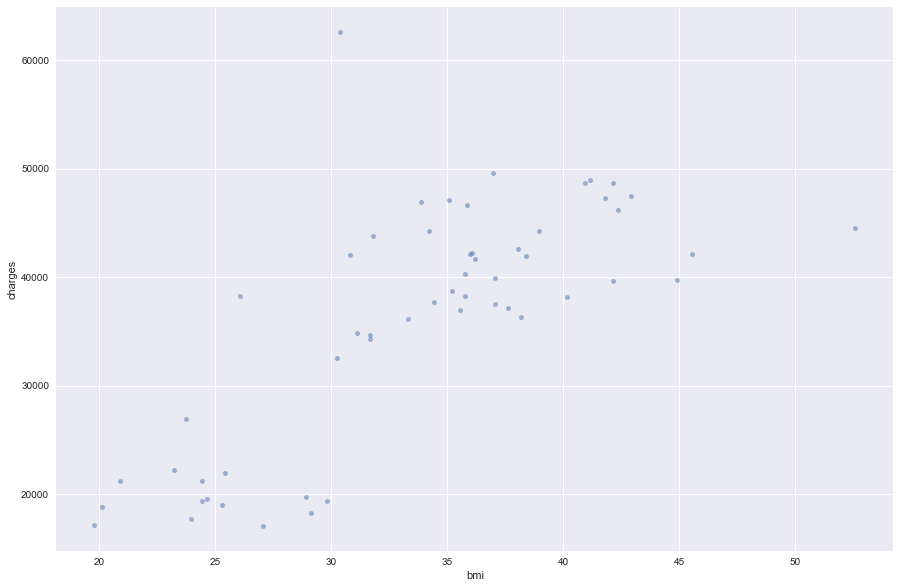

In [40]:
# Pandas scatter plot
malesmoker_se_num_only.plot(kind='scatter', x='bmi', y='charges', alpha=0.5)

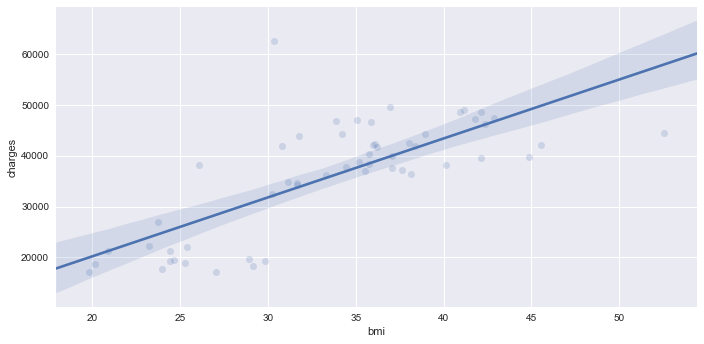

In [43]:
# Seaborn scatter plot with regression line
sns.lmplot(x='bmi', y='charges', data=malesmoker_se_num_only, aspect=2, scatter_kws={'alpha':0.2})

Create a linear regression model

In [44]:
# create X and y
feature_cols = ['bmi']
X = malesmoker_se_num_only[feature_cols]
Y = malesmoker_se_num_only.charges

In [45]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-2994.130852
[ 1159.70193814]


Predict if bmi = 33.5

In [47]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_* 33.5

array([ 35855.88407582])

In [48]:
# use the predict method
linreg.predict(33.5)

array([ 35855.88407582])

Coefficients: 
 [ 1322.46463818]
Mean squared error: 91657653.78
Variance score: 0.24


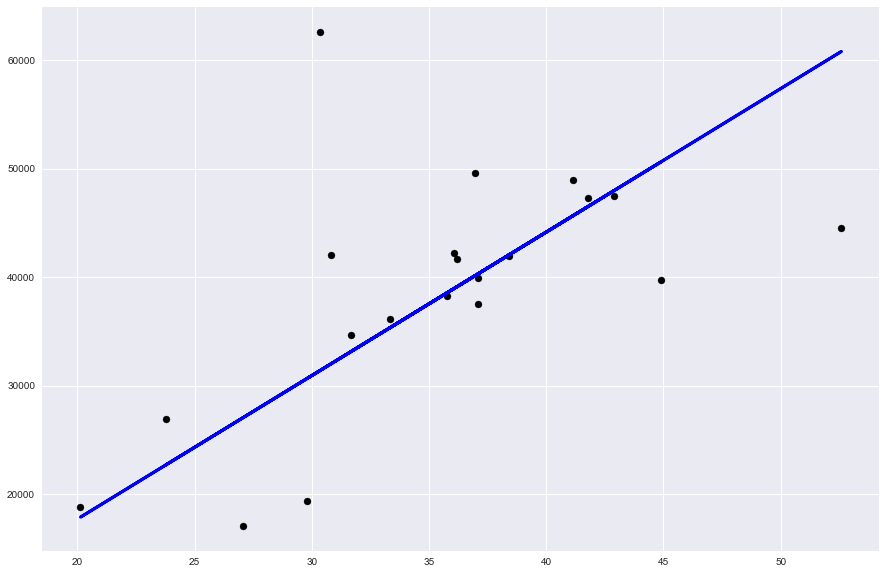

In [49]:
#Build linear regression model for training and testing set

from sklearn import linear_model

malesmoker_se_num_only_X = malesmoker_se_num_only.bmi[:, np.newaxis]

malesmoker_se_num_only_X_train = malesmoker_se_num_only_X[:-20] #training set
malesmoker_se_num_only_X_test = malesmoker_se_num_only_X[-20:]  #testing set

malesmoker_se_num_only_y_train = malesmoker_se_num_only.charges[:-20]  #training set
malesmoker_se_num_only_y_test = malesmoker_se_num_only.charges[-20:]   #testing set

regr = linear_model.LinearRegression()

regr.fit(malesmoker_se_num_only_X_train, malesmoker_se_num_only_y_train)

print('Coefficients: \n', regr.coef_)

print ('Mean squared error: %.2f' % np.mean((regr.predict(malesmoker_se_num_only_X_test) - malesmoker_se_num_only_y_test) ** 2))

print('Variance score: %.2f' % regr.score(malesmoker_se_num_only_X_test, malesmoker_se_num_only_y_test))


plt.scatter(malesmoker_se_num_only_X_test, malesmoker_se_num_only_y_test, color='black')
plt.plot(malesmoker_se_num_only_X_test, regr.predict(malesmoker_se_num_only_X_test), color='blue', linewidth=3)
plt.show()

## Comparing models with train/test split and RMSE

In [50]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\mkrijal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = malesmoker_se_num_only[feature_cols]
    y = malesmoker_se_num_only.charges
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [52]:
train_test_rmse(['bmi'])

7364.1550054803911

## Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [53]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 36155.77015714,  36155.77015714,  36155.77015714,  36155.77015714,
        36155.77015714,  36155.77015714,  36155.77015714,  36155.77015714,
        36155.77015714,  36155.77015714,  36155.77015714,  36155.77015714,
        36155.77015714,  36155.77015714])

In [54]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

11818.093886279714